# Exploratory Data Analysis 0: Initial Data Analysis

Initial data analysis is a subset of exploratory data analysis which focuses on making the data fit to be put into a model. This means dealing with non-existant values, normalizing as necescary, and completing other tasks as necescary by the final model to be used.

Sources:
https://reader.elsevier.com/reader/sd/pii/S0022522315017948?token=E85E57F81B03A15524B9F114673CAF3F3F0FF45188AA953EB7FDD8195887A04325990D11A24383AC4424F669BB95EDAE

In [2]:
import pandas as pd 
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
import pathlib

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# Initializing data
vg_df = pd.read_csv(pathlib.Path('vgsales.csv'))

In [4]:

vg_df.dtypes
vg_df.describe()

InteractiveShell.ast_node_interactivity = "last_expr"

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


### Check for duplicates

In [5]:
# Check for duplicates
duplicate_bool_ser = vg_df.duplicated(keep = False)

duplicate_bool_ser[duplicate_bool_ser == True]

Series([], dtype: bool)

### Check for Nonexistant Values/Nones (grouped together as nulls) and other unknowns

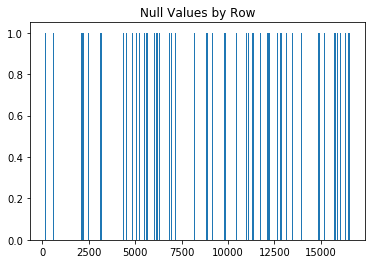

,NaNs_in_Rank,NaNs_in_Name,NaNs_in_Platform,NaNs_in_Year,NaNs_in_Genre,NaNs_in_Publisher,NaNs_in_NA_Sales,NaNs_in_EU_Sales,NaNs_in_JP_Sales,NaNs_in_Other_Sales,NaNs_in_Global_Sales
0,0,0,0,271,0,58,0,0,0,0,0


In [6]:
plt.bar(vg_df[vg_df.isnull().any(axis = 1)].index, 1, width = 10)
plt.title("Null Values by Row")
plt.show()


NaN_count_col_df = pd.DataFrame()
for col in vg_df.columns:
    NaN_count_col_df[f'NaNs_in_{col}'] = [vg_df[col].isnull().values.sum()]
NaN_count_col_df

In [20]:
InteractiveShell.ast_node_interactivity = "all"

# Found synonyms of null, unknown, nonexistant, n/a, not any etc that might be present in a dataset

unknown_synonyms = ['unknown', 'untold', 'undetermined', 'undefined', 'hidden', 'indefinite', 'pending', 'inconclusive', 'unnamed', 'undesignated', 'insignificant', 'nonexistant', 'non-existant', 'missing', 'absent', 'unavailable', 'nonexistent', 'withdrawn', 'null', 'invalid', 'void', 'rescinded', 'repealed', 'blank', 'empty', 'canceled', 'revoked', 'rescinded', 'not any', 'n/a', 'None', 'nan', 'excluded',]

# Select columns with dtype 'object' and converting all strings to lowercase
obj_cols = ['Name', 'Platform', 'Genre', 'Publisher']

obj_vg_df = pd.DataFrame(dtype = 'object')
for col in obj_cols:
    obj_vg_df[col] = vg_df[col].str.lower()

# Recording where the word occus

for word in unknown_synonyms:
    for col in obj_cols:
        print(word)
        print(col)
        obj_vg_df.index[obj_vg_df[col] == word].tolist


#vg_obj_df.where(vg_obj_df in unknown_synonyms)

unknown
Name


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

unknown
Platform


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

unknown
Genre


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

unknown
Publisher


<bound method IndexOpsMixin.tolist of Int64Index([  940,  1649,  2114,  2173,  2236,  2286,  2295,  2328,  2484,
             2491,
            ...
            16286, 16307, 16366, 16424, 16427, 16460, 16493, 16532, 16545,
            16581],
           dtype='int64', length=203)>

untold
Name


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

untold
Platform


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

untold
Genre


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

untold
Publisher


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

undetermined
Name


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

undetermined
Platform


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

undetermined
Genre


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

undetermined
Publisher


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

undefined
Name


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

undefined
Platform


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

undefined
Genre


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

undefined
Publisher


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

hidden
Name


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

hidden
Platform


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

hidden
Genre


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

hidden
Publisher


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

indefinite
Name


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

indefinite
Platform


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

indefinite
Genre


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

indefinite
Publisher


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

pending
Name


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

pending
Platform


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

pending
Genre


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

pending
Publisher


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

inconclusive
Name


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

inconclusive
Platform


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

inconclusive
Genre


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

inconclusive
Publisher


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

unnamed
Name


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

unnamed
Platform


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

unnamed
Genre


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

unnamed
Publisher


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

undesignated
Name


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

undesignated
Platform


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

undesignated
Genre


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

undesignated
Publisher


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

insignificant
Name


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

insignificant
Platform


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

insignificant
Genre


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

insignificant
Publisher


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

nonexistant
Name


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

nonexistant
Platform


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

nonexistant
Genre


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

nonexistant
Publisher


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

non-existant
Name


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

non-existant
Platform


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

non-existant
Genre


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

non-existant
Publisher


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

missing
Name


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

missing
Platform


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

missing
Genre


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

missing
Publisher


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

absent
Name


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

absent
Platform


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

absent
Genre


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

absent
Publisher


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

unavailable
Name


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

unavailable
Platform


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

unavailable
Genre


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

unavailable
Publisher


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

nonexistent
Name


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

nonexistent
Platform


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

nonexistent
Genre


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

nonexistent
Publisher


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

withdrawn
Name


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

withdrawn
Platform


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

withdrawn
Genre


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

withdrawn
Publisher


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

null
Name


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

null
Platform


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

null
Genre


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

null
Publisher


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

invalid
Name


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

invalid
Platform


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

invalid
Genre


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

invalid
Publisher


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

void
Name


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

void
Platform


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

void
Genre


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

void
Publisher


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

rescinded
Name


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

rescinded
Platform


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

rescinded
Genre


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

rescinded
Publisher


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

repealed
Name


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

repealed
Platform


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

repealed
Genre


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

repealed
Publisher


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

blank
Name


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

blank
Platform


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

blank
Genre


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

blank
Publisher


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

empty
Name


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

empty
Platform


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

empty
Genre


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

empty
Publisher


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

canceled
Name


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

canceled
Platform


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

canceled
Genre


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

canceled
Publisher


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

revoked
Name


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

revoked
Platform


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

revoked
Genre


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

revoked
Publisher


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

rescinded
Name


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

rescinded
Platform


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

rescinded
Genre


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

rescinded
Publisher


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

not any
Name


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

not any
Platform


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

not any
Genre


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

not any
Publisher


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

n/a
Name


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

n/a
Platform


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

n/a
Genre


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

n/a
Publisher


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

None
Name


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

None
Platform


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

None
Genre


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

None
Publisher


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

nan
Name


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

nan
Platform


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

nan
Genre


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

nan
Publisher


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

excluded
Name


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

excluded
Platform


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

excluded
Genre


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>

excluded
Publisher


<bound method IndexOpsMixin.tolist of Int64Index([], dtype='int64')>